In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../input/bmstu-subscribers-dataset/Abonents.csv',sep=';')

In [44]:
data.head()

,Код,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Кол-во звонков на стационарные телефоны,Количество SMS за месяц
0,0,24,121.54,2.4,12,65,5,0,0,5,56
1,1,51,287.51,1.7,111,109,1,44,0,6,1
2,2,41,113.70,2.1,41,27,0,0,0,1,36
3,3,35,410.23,5.6,47,49,0,0,0,11,23
4,4,26,537.60,4.8,58,77,4,0,0,16,29


In [45]:
y = data['Код']
data = data.drop(['Код'], axis=1)
test_data = data[:100]
data.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Кол-во звонков на стационарные телефоны,Количество SMS за месяц
0,24,121.54,2.4,12,65,5,0,0,5,56
1,51,287.51,1.7,111,109,1,44,0,6,1
2,41,113.70,2.1,41,27,0,0,0,1,36
3,35,410.23,5.6,47,49,0,0,0,11,23
4,26,537.60,4.8,58,77,4,0,0,16,29


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaledData = scaler.fit_transform(data)
scaledData

array([[0.09803922, 0.02302912, 0.11557789, ..., 0.        , 0.08333333,
        0.31284916],
       [0.62745098, 0.05532164, 0.08040201, ..., 0.        , 0.1       ,
        0.00558659],
       [0.43137255, 0.0215037 , 0.10050251, ..., 0.        , 0.01666667,
        0.20111732],
       ...,
       [0.80392157, 0.09091015, 0.17085427, ..., 0.        , 0.31666667,
        0.02793296],
       [0.37254902, 0.16651361, 0.46231156, ..., 0.        , 0.46666667,
        0.38547486],
       [0.2745098 , 0.02894011, 0.07035176, ..., 0.        , 0.13333333,
        0.13407821]])

# Trying to hardcode SOM algorithm

In [ ]:
def createGrid(w=5,h=5,d=3):
    random.seed(10)
    return{(i,j):np.random.rand(d)
          for i in range(w)
          for j in range(h)}

In [49]:
def plotSOM(grid,X = test_data, y = y, title = 'title'):
    for i in np.unique(y):
        plt.plot(X[y==i][:,0], X[y==i][:,1],'o')
    weights = np.array(list(grid.values()))
    plt.plot(weights[:,0],weights[:,1],'--ko')
    
    for coord, node in grid.items():
        plt.annotate(coord, node)
    plt.title(title)

In [ ]:
def findBMU(x, grid):
    distances = {coord: np.linalg.norm(x-node) for coord, node in grid.items()}
    return min(distances, key=distances.get)

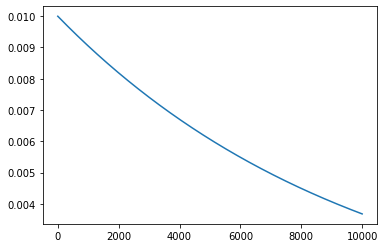

In [57]:
def decay_learning_rate(initial_learning_rate, T2, n_iterations):
    return initial_learning_rate * np.exp(-T2/n_iterations)
#lr, n = 0.01, 10000
#plt.plot([decay_learning_rate(lr,i+1,n) for i in range(n)])

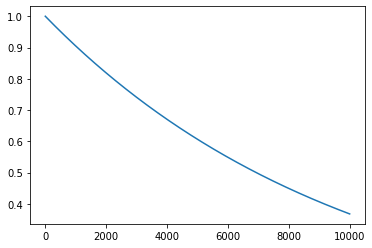

In [58]:
def decay_radius(initial_radius, T1, n_iterations):
    time_constant = n_iterations/initial_radius
    return initial_radius * np.exp(-T1 / time_constant)
#r0, n = 1, 10000
#plt.plot([decay_radius(r0, i, n) for i in range(n)])

In [59]:
def beta(BMU, grid, r):
    distances2BMU = {coord: np.linalg.norm(np.array(BMU) - np.array(coord))
                    for coord in grid.keys()}
    effectOnNeighbours = {coord: np.exp(-dMBU/(2*r**2))
                         for coord, dMBU in distances2BMU.items()}
    return effectOnNeighbours

In [60]:
def SOM(width = 5, height = 5, n_iterations = 50000,
       alpha_0 = 0.1, k = 100, display = True):
    radius_0 = max(width,height)/2
    grid = createGrid(w = width, h = height)
    grids = [grid]
    iterations = [0]
    
    for i in range(n_iterations):
        data_point = X[np.random.randint(0, X.shape[0])]
        BMU = findBMU(data_point, grid)
        r_t = decay_radius(radius_0,i,n_iterations)
        nei = beta(BMU, grid, r_t)
        alpha_t = decay_learning_rate(alpha_0, i , n_iterations)
        grid = {coord: (w + alpha_t * nei[coord] * (data_point - w))
               for coord, w in grid.items()}
        
        if (i+1) % (n_iterations//k) == 0 or i < 20:
            if display: print(i)
            grids.append(grid)
            iterations.append(i)
    return grids, iterations